In [ ]:
pip install google.cloud

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.cloud import bigquery

In [3]:
from google.colab import auth

In [4]:
auth.authenticate_user()

In [5]:
project_id = 'mystic-rigging-417723'

In [6]:
client = bigquery.Client(project= project_id)

In [7]:
df = client.query(''' SELECT * FROM `mystic-rigging-417723.schema_projeto.tabela_wcup18` ''')

In [8]:
dados = client.query(''' SELECT * FROM `mystic-rigging-417723.schema_projeto.tabela_wcup18` ''')
df = dados.result().to_dataframe()

In [9]:
jogadores_acima_188 = df[df['Altura'] >= 188]
total_jogadores_acima_188 = len(jogadores_acima_188)
print(total_jogadores_acima_188)

174


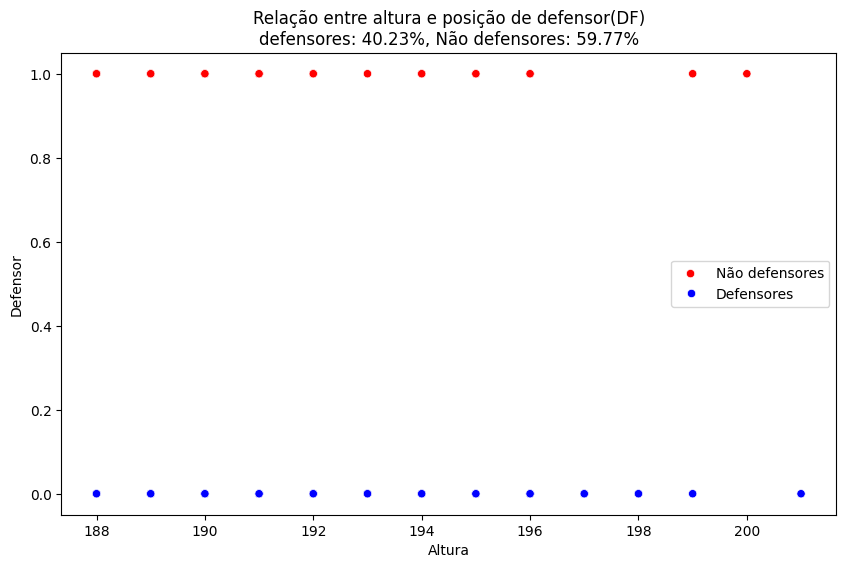

In [10]:
df['Defensores'] = df['Posicao'] == 'DF'

df_filtrado = df[df['Altura'] >= 188]

total = len(df_filtrado)
defensores = len(df_filtrado[df_filtrado['Defensores']])
nao_defensores = total - defensores
percent_defensores = (defensores / total) * 100
percent_nao_defensores = (nao_defensores / total) * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x='Altura', y='Defensores', hue='Defensores', palette={False: 'blue', True: 'red'})
plt.xlabel('Altura')
plt.ylabel('Defensor')
plt.title(f'Relação entre altura e posição de defensor(DF)\ndefensores: {percent_defensores:.2f}%, Não defensores: {percent_nao_defensores:.2f}%')
plt.legend(title='', loc='center right', labels=['Não defensores', 'Defensores'])
plt.show()
